# Исследование данных о продаже игр

Работа в интересах интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Файл с данными и общая информация 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('games.csv')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Отобразим основную информацию о датафрейме**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Построим общую гистограмму для всех числовых столбцов таблицы**

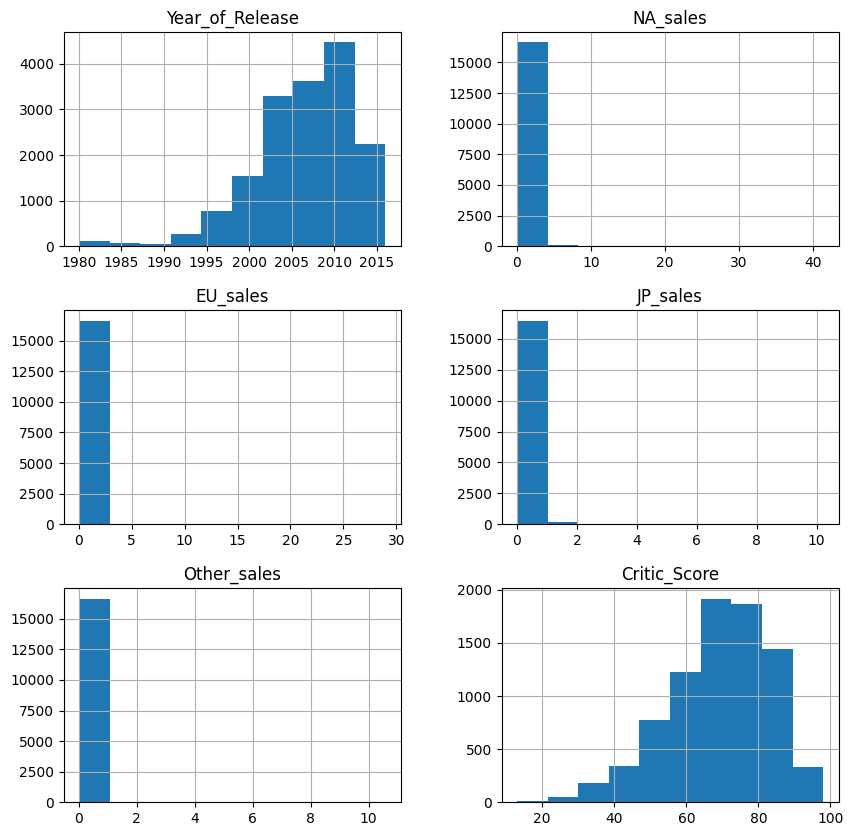

In [4]:
data.hist(figsize=(10, 10));

-----

- **Отобразили начальные строки таблицы и общую информацию**
-- Имеем таблицу с 11 столбцами(6 числовых и 5 строковых) и 16715 строками
- **Описание данных**
1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- **Данные за 2016 год могут быть неполными**
- **Построили общую гистограмму для всех числовых столбцов таблицы, предварительно наблюдаем:** 
-- большее количество игр было выпущено с 2009 по 2012 годы, до 1992 года количесвтво игр было не значительное
-- большая часть продаж игры в регионе Сверной Америки до 5 млн. копий
-- большая часть продаж игры в регионе Европы до 3 млн. копий
-- большая часть продаж игры в Японии до 1 млн. копий
-- большая часть продаж игры в других регионах до 1 млн. копий
-- самая популярная оценка критиков 70-80 баллов, частота меньших и больших оценок снижается
---

## Предобработка данных

### Заменим названия столбцов (приведем к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему

In [6]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

**В столбце `year_of_release` переведем значения в специальный формат для работы с датами**

In [7]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'].head()

0   2006-01-01
1   1985-01-01
2   2008-01-01
3   2009-01-01
4   1996-01-01
Name: year_of_release, dtype: datetime64[ns]

### Обработаем пропуски при необходимости

**Определим количество пропущенных значений для каждого столбца**

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Попытаемся описать причины, которые могли привести к пропускам

In [9]:
display(len(data[data['na_sales'] <= 0.1]))
data[data['na_sales'] <= 0.1].isna().sum()

9559

name                  1
platform              0
year_of_release     148
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6020
user_score         4936
rating             4989
dtype: int64

###### **Большая часть пропусков у игр, продажи которых не высокие, возможно данных от пользователей и критиков не хватает для выставления оценок и рейтингов у таких игр**

#### Заполнение пропусков

**Заполниим пропуски в столбце `rating` текстовым значением 'no_rating', по смыслу это ничего не изменит, но в дальнейшем позволит корректно провести исследование**

In [10]:
data['rating'] = data['rating'].fillna('no_rating')

**Заполниим пропуски в столбце `name` текстовым значением 'no_name', по смыслу это ничего не изменит, но в дальнейшем позволит корректно провести исследование**

In [11]:
data['name'] = data['name'].fillna('no_name')

**Пропуски в столбцах `year_of_release, critic_score, user_score` заполнять не будем, так как невозможно предложить логичную замену, оставим эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать**

#### Обратитим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишите, как его обработать

В столбце `user_score` содержится значение **tbd**, оно означает To Be Determined, не определено по каким-то причинам. Т.е другими словами нет данных. Заменим эти значения на `NaN`

In [12]:
data['user_score'] = data['user_score'].replace('tbd', None)

In [13]:
data['user_score'] = data['user_score'].astype('float')  # изменим тип столбца на численный

### Обработаем дубликаты

#### Выявим явные дубликаты и удалим, если таковые имеются

In [14]:
data.duplicated().sum() # явные дубликаты отсутствуют

0

#### Выявим неявные дубликаты, в нашем проекте это могут быть дубликаты для пары "Имя - Игровая консоль"

In [15]:
data.duplicated(subset=['name', 'platform']).sum()   # есть 5 совпадений

5

In [16]:
data_duplicated = data[data.duplicated(subset=['name', 'platform'])]   # найдем наши дубликаты
data_duplicated

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaT,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012-01-01,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,no_name,GEN,1993-01-01,NaN,0.0,0.00,0.03,0.00,NaN,NaN,no_rating
16230,Madden NFL 13,PS3,2012-01-01,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [17]:
# сравним каждый дубликат и решим что с ними делать
for i in data_duplicated.index:
    display(data[(data['name'] == data_duplicated.loc[i, 'name']) & (data['platform'] == data_duplicated.loc[i, 'platform'])])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012-01-01,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006-01-01,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaT,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005-01-01,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012-01-01,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,no_name,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,no_rating
14244,no_name,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,no_rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012-01-01,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012-01-01,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


- Need for Speed: Most Wanted на платформах X360 и PC, а также Sonic the Hedgehog похоже выпущены в разные годы, возможно это разные релизы, поэтому оставим эти строки без изменений
- Игра без названия на платформе GEN может быть совсем разными играми, не можем удалить, оставляем
- Madden NFL 13 на платформе PS3 похож на дубляж одной и той же игры, поэтому удалим строку 16230

In [18]:
data.drop(index=[16230], inplace = True)    # удалим строку 16230

### Обработаем редкие и выбивающиеся значения

In [19]:
data.describe()   # оценим общие данные по всей таблице

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16714.000000,16714.000000,16714.000000,16714.000000,8136.000000,8759.000000
mean,0.263393,0.145068,0.077622,0.047345,68.965954,7.099931
std,0.813625,0.503352,0.308862,0.186736,13.938153,1.520055
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [20]:
data['year_of_release'].unique()

array(['2006-01-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1989-01-01T00:00:00.000000000',
       '1984-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '1990-01-01T00:00:00.000000000',
       '1988-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1993-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1982-01-01T00:00:00.000000000', '2016-01-01

**Артефактов не обнаружено, все значения адекватны**

### Оценим общую информацию по таблице после преобразований

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16714 non-null  object        
 1   platform         16714 non-null  object        
 2   year_of_release  16445 non-null  datetime64[ns]
 3   genre            16712 non-null  object        
 4   na_sales         16714 non-null  float64       
 5   eu_sales         16714 non-null  float64       
 6   jp_sales         16714 non-null  float64       
 7   other_sales      16714 non-null  float64       
 8   critic_score     8136 non-null   float64       
 9   user_score       8759 non-null   float64       
 10  rating           16714 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [22]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


---
- **заменили названия столбцов (привели к нижнему регистру)**
- **преобразовали данные в нужные типы**
-- в столбце year_of_release перевели значения в специальный формат для работы с датами
- **обработали пропуски**
-- определили количество пропущенных значений для каждого столбца
-- попытались описать причины, которые могли привести к пропускам
-- - большая часть пропусков у игр, продажи которых не высокие, возможно данных от пользователей и критиков не хватает для выставления оценок и рейтингов у таких игр
-- заполнили пропуски
-- - в столбце rating текстовым значением 'no_rating', по смыслу это ничего не изменит, но в дальнейшем позволит корректно провести исследование
-- - в столбце name текстовым значением 'no_name', по смыслу это ничего не изменит, но в дальнейшем позволит корректно провести исследование
-- - в столбцах year_of_release, critic_score, user_score заполнять не будем, так как невозможно предложить логичную замену, оставим эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать
-- - в столбце user_score содержится значение tbd, оно означает To Be Determined, не определено по каким-то причинам. Т.е другими словами нет данных. Заменили эти значения на NaN
- **обработали дубликаты**
-- явные дубликаты отсутствуют
-- выявили неявные дубликаты, в нашем проекте это могут быть дубликаты для пары "Имя - Игровая консоль", нашли 5 дубликатов и обработали их вручную, часть данных оставили без изменений, часть удалили
- **обработали редкие и выбивающиеся значения**
-- артефактов не обнаружено, все значения адекватны
- **посчитали суммарные продажи во всех регионах и записали их в отдельный столбец**
---

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

**Получим истинное количество «игр по годам», для этого найдем дубликаты (используя subset по (Годам - Названиям игр) и затем исключим из полного датафрейма все дубли за исключением одной, «первой», строки**

In [23]:
len(data['year_of_release'].unique())   # всего лет в таблице (так же есть пропущенные значения NaN)

38

In [24]:
data_dupli_year = data.drop_duplicates(subset=['name', 'year_of_release'], keep='first')
data_dupli_year.groupby('year_of_release')['platform'].count().to_frame()

,platform
year_of_release,
1980-01-01,9
1981-01-01,46
1982-01-01,36
1983-01-01,17
1984-01-01,14
1985-01-01,14
1986-01-01,21
1987-01-01,16
1988-01-01,15


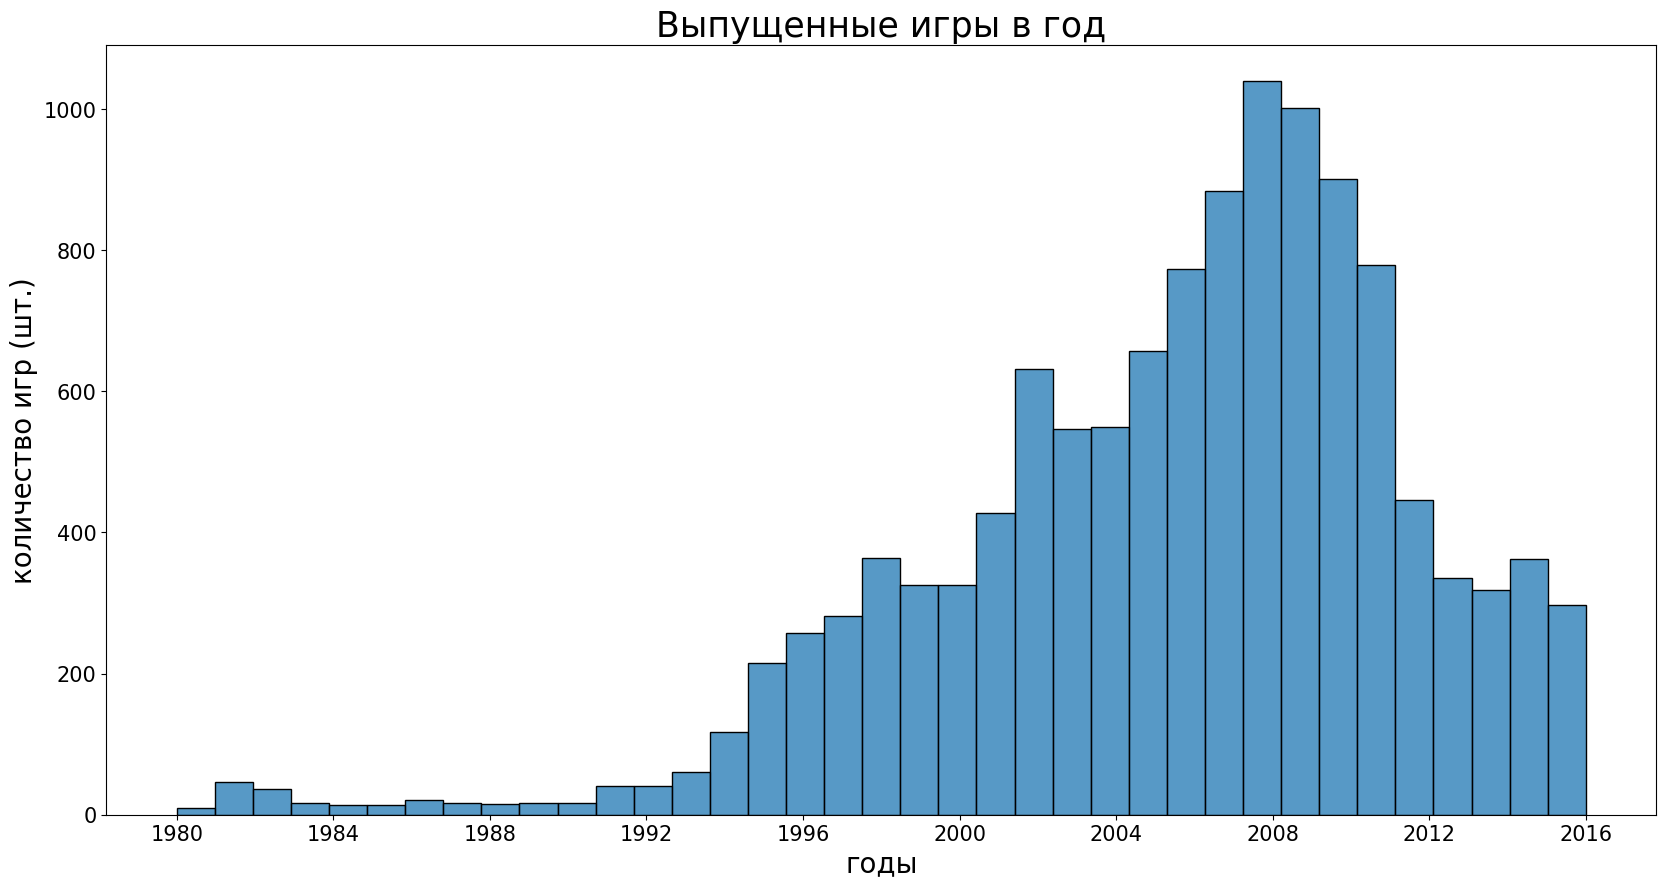

In [25]:
plt.figure(figsize=[20, 10])
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
seaborn.histplot(data=data_dupli_year['year_of_release'], bins=37)
plt.title('Выпущенные игры в год', fontsize=25)
plt.xlabel('годы', fontsize=20)
plt.ylabel('количество игр (шт.)', fontsize=20)
plt.show()

**С 1980 по 1993 годы, выпуск игр был незначительный (менее 100 игр в год) по сравнению с последующим периодом. Данные за этот период не так важны**

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [26]:
platform_leader = (data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
    .head(10)
    .reset_index()
             )
platform_leader            # топ-10 платформ за все время

,platform,sum_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.64
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


**Напишем функцию для анализа топ-10 платформ**

In [27]:
def analize_func(data, platform):
    table = (data.loc[data['platform'] == platform]
         .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
         .reset_index()
    )
    table['year_of_release'] = table['year_of_release'].dt.year
    #display(table)
    #table = table.rename(columns={'sum_sales': platform})
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    table.plot(x='year_of_release', kind='bar', legend=False)
    plt.title(platform, fontsize=15)
    plt.xlabel('годы', fontsize=10)
    plt.ylabel('суммарные продажи (млн шт. копий)', fontsize=10)

**Посмотрим платформы `PS2 X360 PS3 Wii DS PS GBA PS4 PSP PC`**

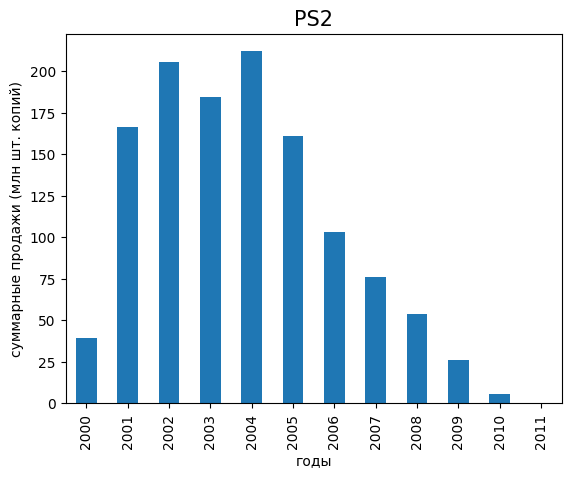

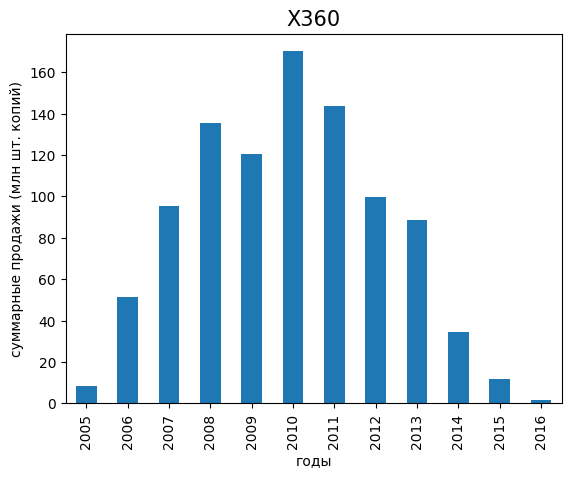

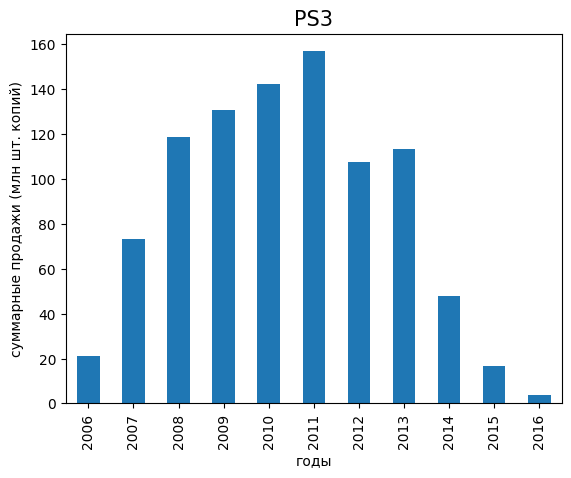

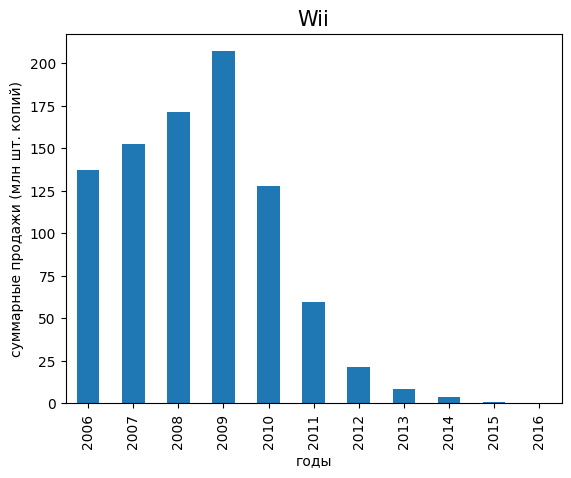

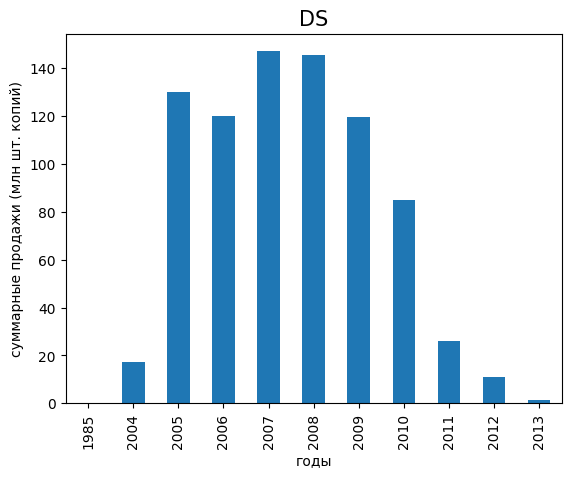

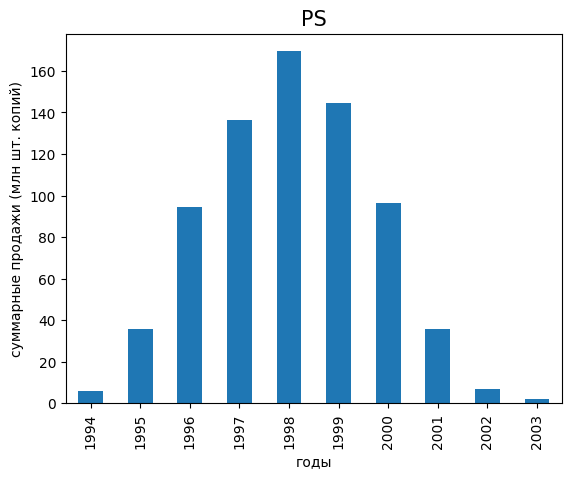

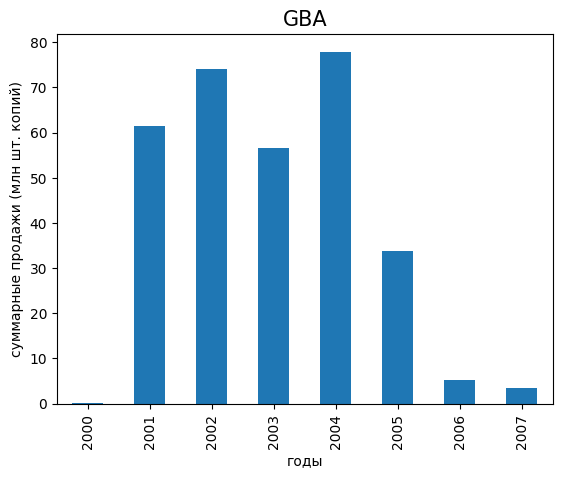

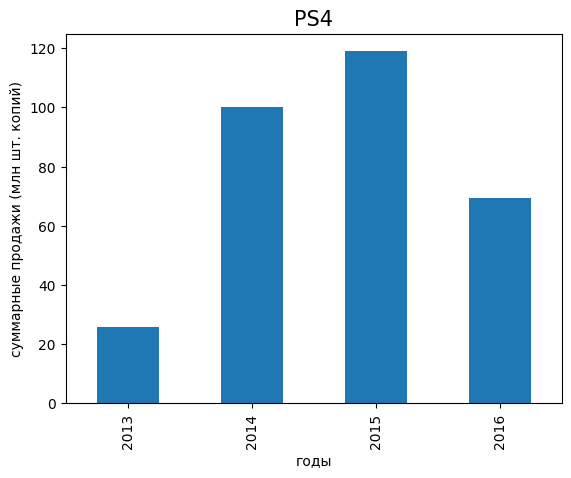

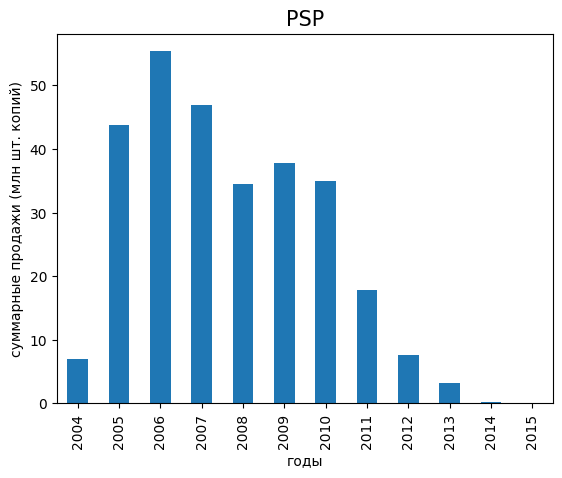

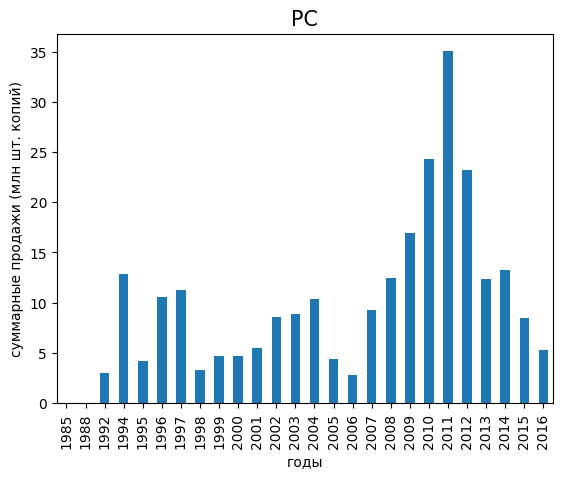

In [28]:
for platform in platform_leader['platform']:
    analize_func(data, platform)
plt.show()

In [29]:
data[(data['platform'] == 'DS') & (data['year_of_release'] < '2000')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985-01-01,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_rating,0.02


**Платформа DS появилась в 2004 году, появление игры в 1985 году - ошибка, возможно вызвана наличием в названии символов 'DS'**

**За какой характерный срок появляются новые и исчезают старые платформы?**

In [30]:
array = []
for platform in platform_leader['platform']:
    array.append(len(data.loc[data['platform'] == platform]
         .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
         .reset_index()
    ))
int(np.median(array))

11

**Медианный возраст жизни платформ-лидеров 11 лет. График жизни платформ похож на колокол, идет нарастание продаж до пика, затем идет спад и конец цикла существования консоли.**

### Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год

**Для стремительно развивающейся игровой индустрии период > 3-4 лет — очень много. За это время могут произойти резкие изменения, например, замена одного поколения консолей следующим (PS -> PS2 -> PS3 -> PS4). Некоторые платформы совсем исчезли (например, платформа DS не имеет новых релизов игр с 2013 года, PS2 с 2011 года, PSP с 2015 года). Эти платформы не помогут нам построить прогноз на 2017 год.  
Другими словами, в сфере электроники, в том числе и консолей, рынок быстро меняется то, что было актуально 5–10 лет назад сейчас уже не интересует потребителя. Например, можно было бы сделать вывод, что популярной останется платформа X360, но ее в 2016 году уже не выпускали, у PS3 поддержка закончилась так же в 2016 году. Nintendo WII и DS тоже не поддерживаются с 2013 года. Если наш «Стримчик» закупит игры для этих платформ, то явно в продажах 2017 года он от этого не выиграет.  
В такой динамично меняющейся индустрии, как компьютерные игры не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. В нашем случае думаю, что 3 года: 2014, 2015 и неполный 2016 - оптимальный выбор**

### Не будем учитывать в работе данные за предыдущие годы

In [31]:
data_new = data[data['year_of_release'] >= '2014']
data_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

In [32]:
data_new.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).to_frame()  # лидеры продаж

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


**Разберем лидеров, оценим на каком жизненном этапе находятся эти платформы**

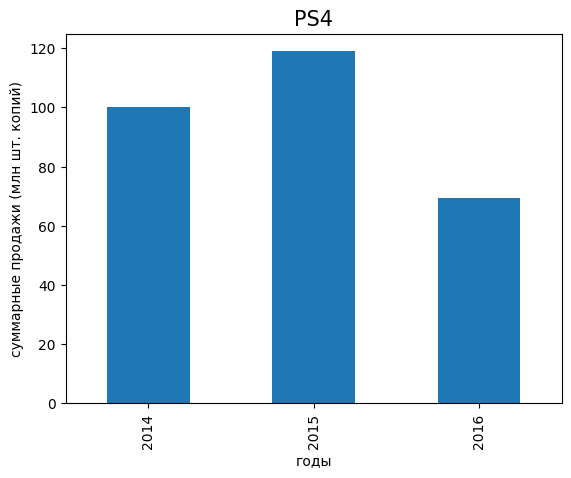

In [33]:
analize_func(data_new, 'PS4')

**Пик пройден, но потенциал на несколько лет еще сохраняется**

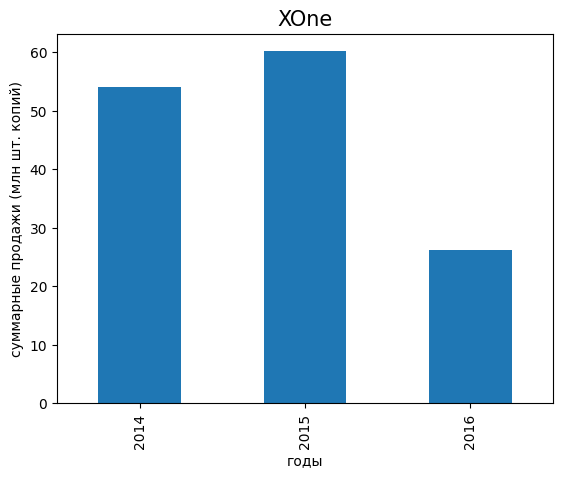

In [34]:
analize_func(data_new, 'XOne')

**Пик пройден, но потенциал на несколько лет еще сохраняется**

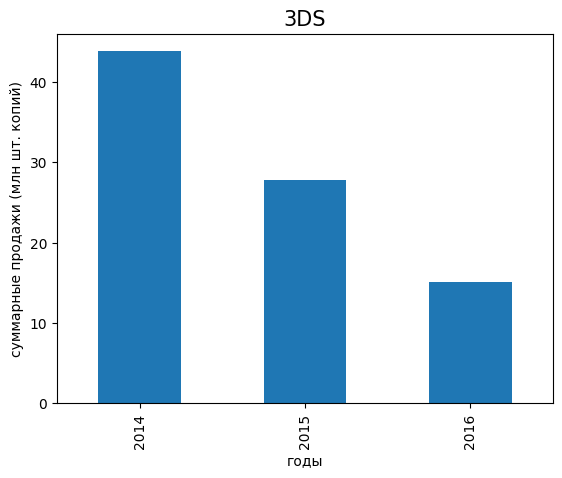

In [35]:
analize_func(data_new, '3DS')

**Пик пройден, потенциала немного**

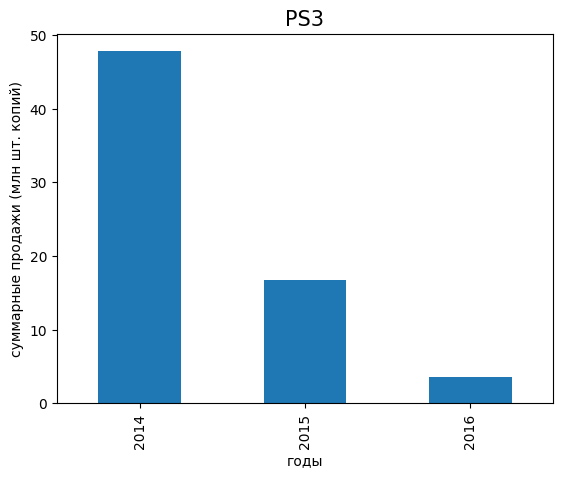

In [36]:
analize_func(data_new, 'PS3')

**Закат цикла, платформа без потенциала**

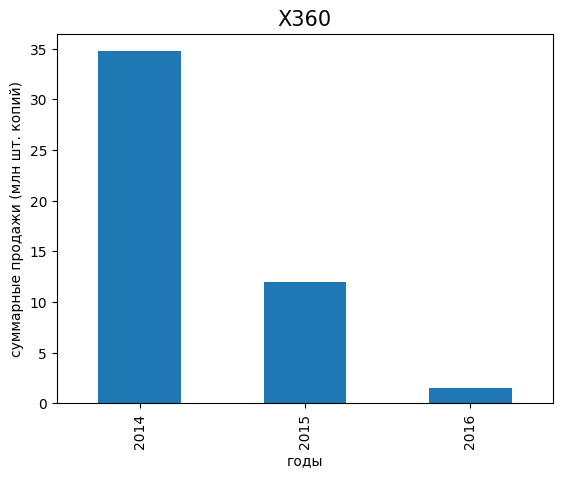

In [37]:
analize_func(data_new, 'X360')

**Закат цикла, платформа без потенциала**

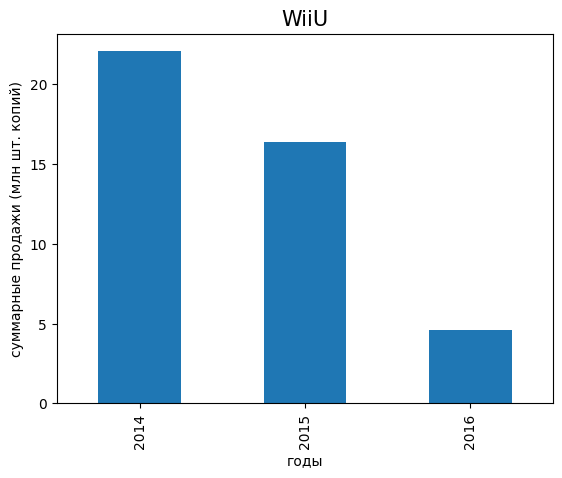

In [38]:
analize_func(data_new, 'WiiU')

**Закат цикла, потенциала не много**

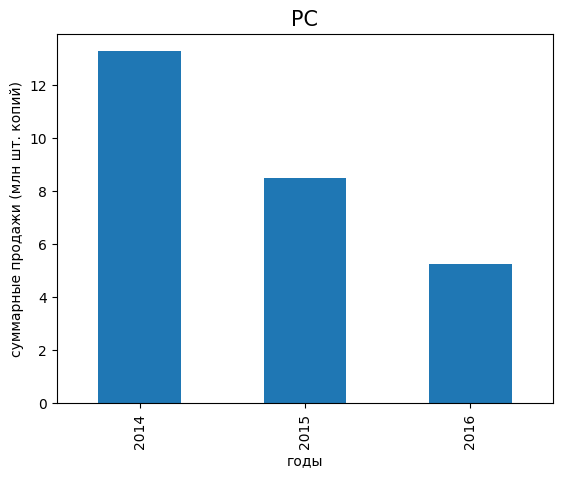

In [39]:
analize_func(data_new, 'PC')

**Самая долгоживущая платформа, потенциал не высокий, но сохраняется**

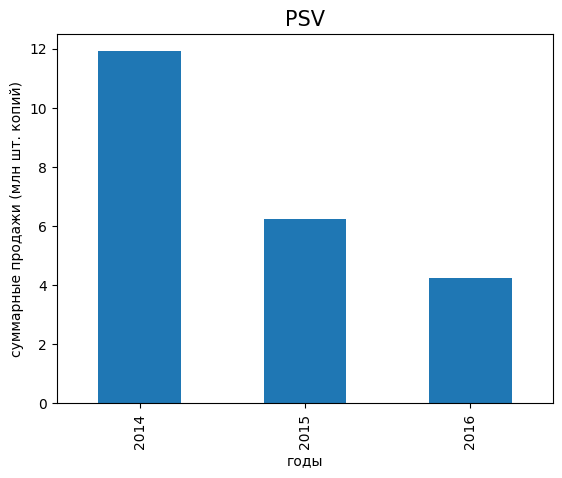

In [40]:
analize_func(data_new, 'PSV')

**Пик пройден, потенциала немного**

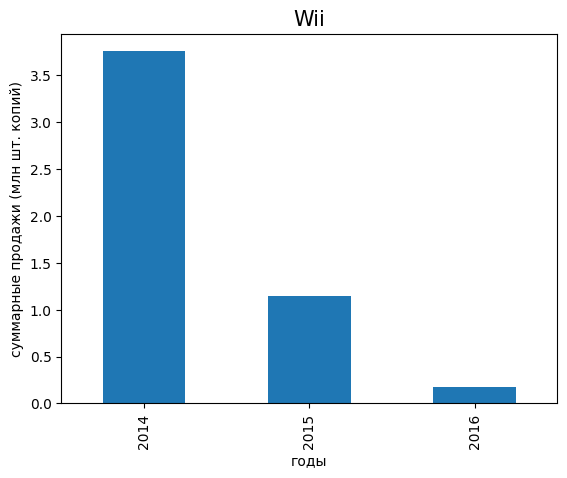

In [41]:
analize_func(data_new, 'Wii')

**Закат цикла, платформа без потенциала**

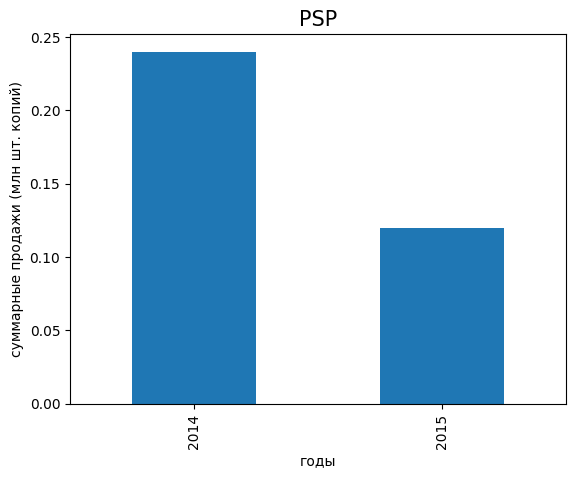

In [42]:
analize_func(data_new, 'PSP')

**Жизнь платформы закончилась в 2015 году**

-----

**Потенциал на 2017 год имеют следующие платформы: PS4, XOne, 3DS, PC, WiiU, PSV.**

In [43]:
(data_new.query('platform in ["PS4", "3DS", "XOne", "PC", "WiiU", "PSV"]')
     .pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum')
     .sort_values(by='2016-01-01', ascending=False)
)

year_of_release,2014-01-01,2015-01-01,2016-01-01
platform,,,
PS4,100.00,118.90,69.25
XOne,54.07,60.14,26.15
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
WiiU,22.03,16.35,4.60
PSV,11.90,6.25,4.25


**Выделим лидеров:**
- **PS4** - лидер продаж последние годы, пик жизненой платформы пройден в 2015 году, имеет лучший потенциал на 2017 год
- **XOne** - второе место по продажам, имеет неплохой потенциал продаж на 2017 год
- **3DS** - третье место, цикл это платформы начался в 2011 году, этот же год был самым удачным, далее только спад, потенциал на 2017 год оцениваем как не высокий

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат

**Рассмотрим на примере трех самых потенциально интересных платформ `PS4, XOne, 3DS`**

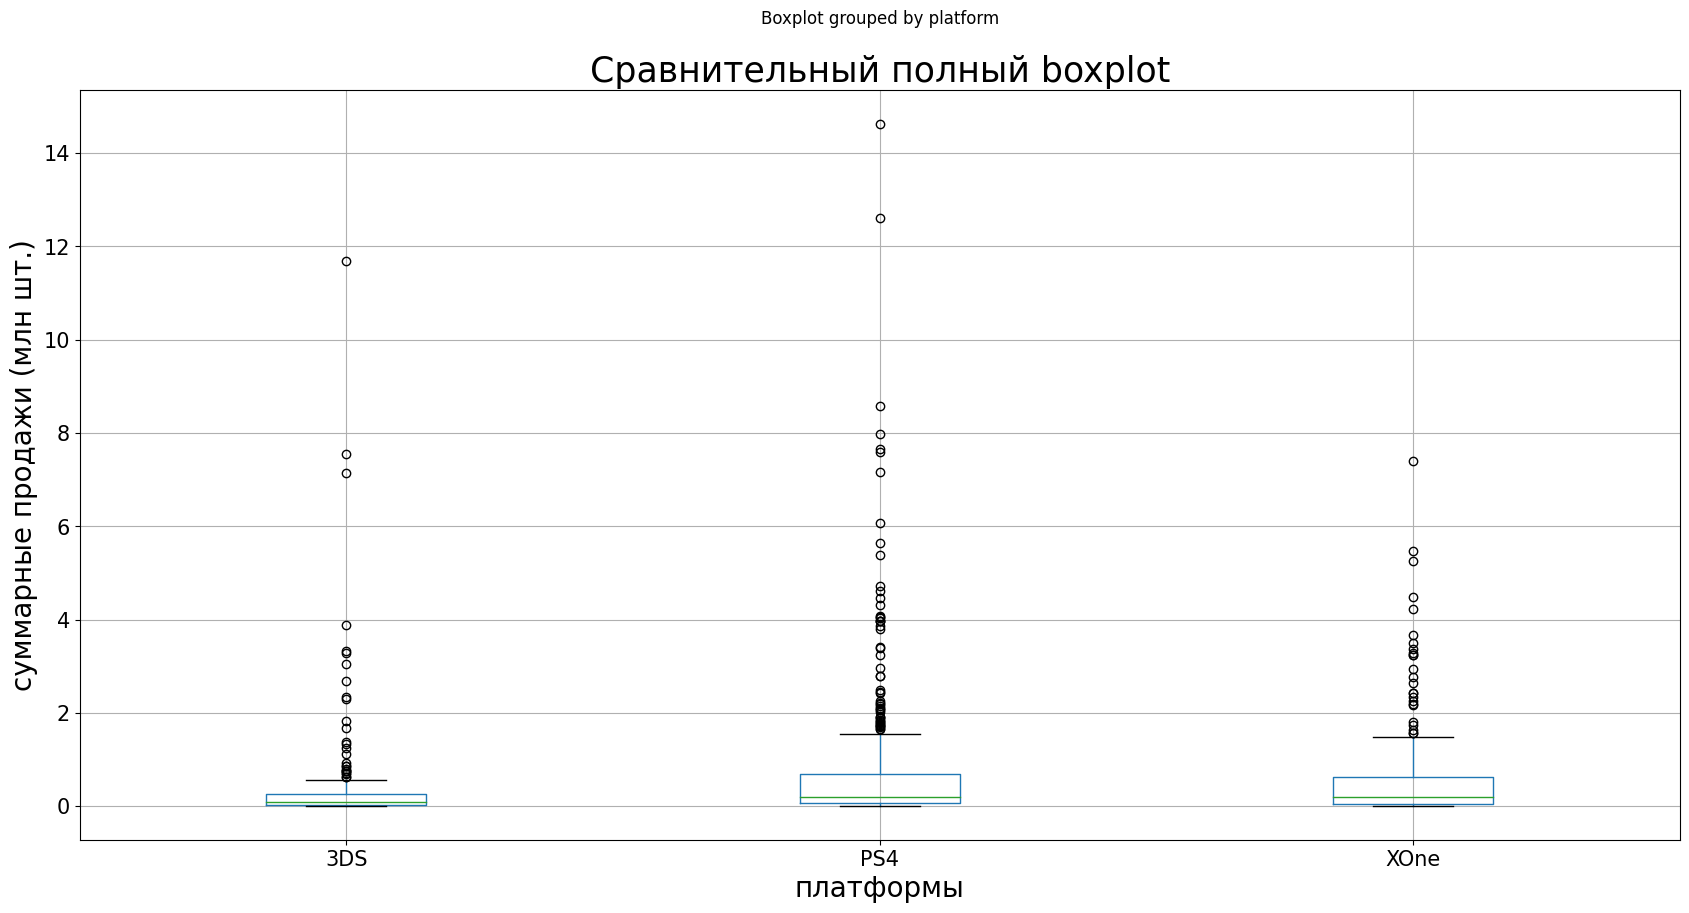

In [44]:
#display(data.query('platform == "PS4"')['sum_sales'].describe().to_frame())
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
data_new.query('platform in ["PS4", "3DS", "XOne"]').boxplot('sum_sales', by='platform', figsize=[20, 10])
plt.title('Сравнительный полный boxplot', fontsize=25)
plt.xlabel('платформы', fontsize=20)
plt.ylabel('суммарные продажи (млн шт.)', fontsize=20)
plt.show()

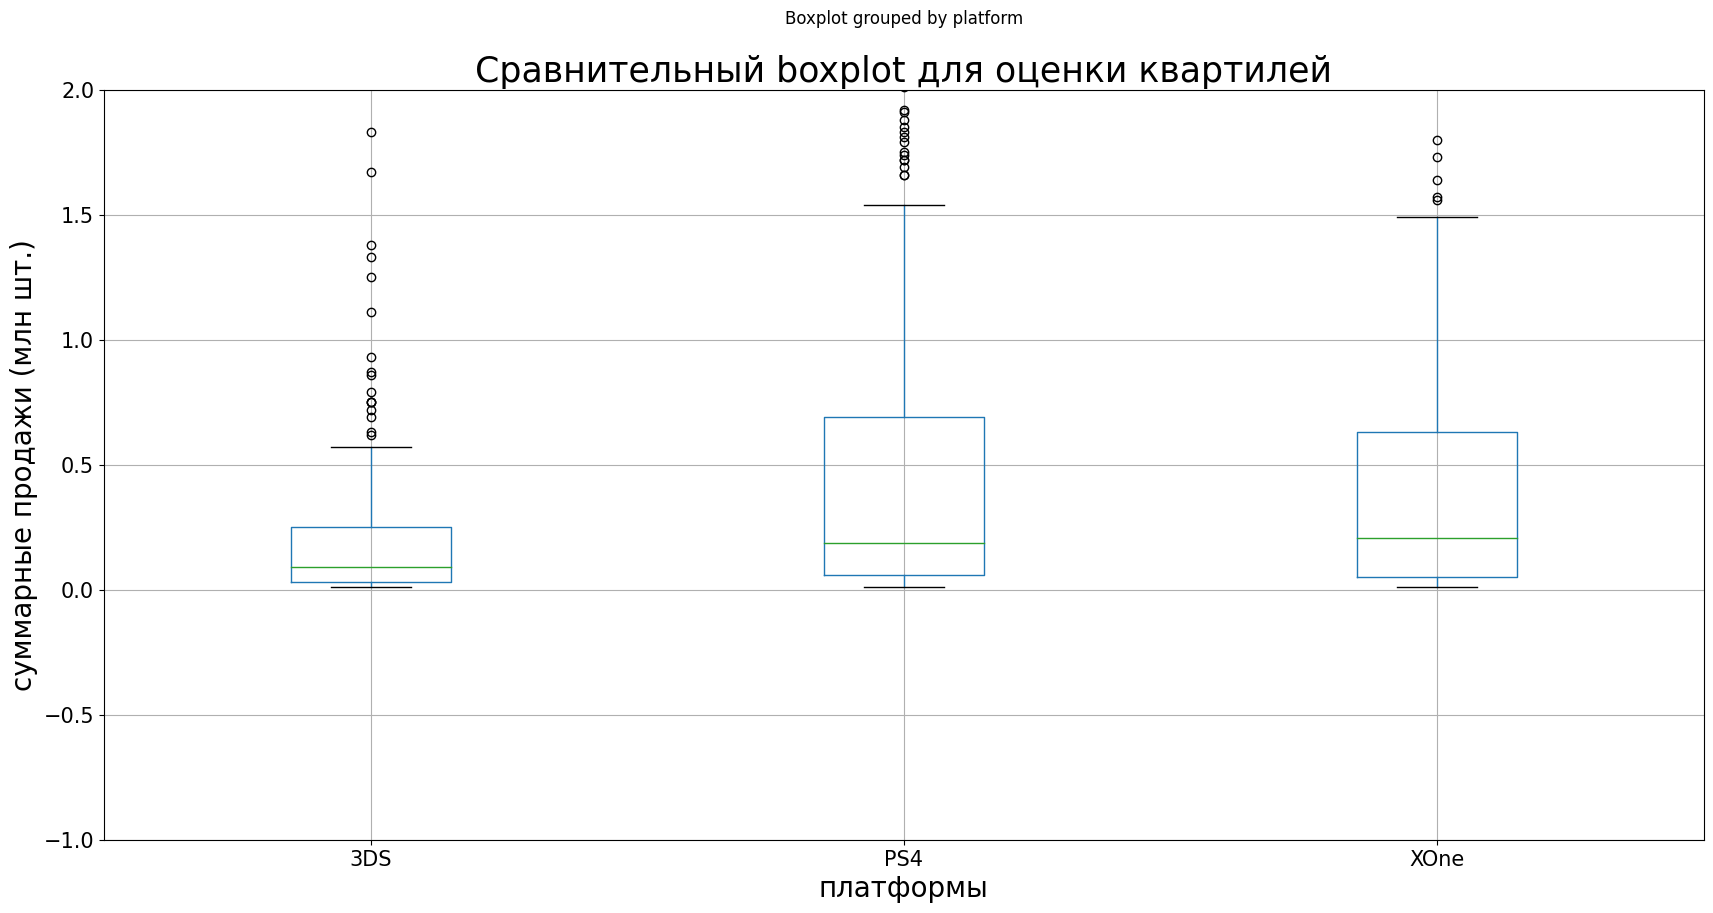

In [45]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
data_new.query('platform in ["PS4", "3DS", "XOne"]').boxplot('sum_sales', by='platform', figsize=[20, 10])
plt.title('Сравнительный boxplot для оценки квартилей', fontsize=25)
plt.xlabel('платформы', fontsize=20)
plt.ylabel('суммарные продажи (млн шт.)', fontsize=20)
plt.ylim(-1, 2)
plt.show()

In [46]:
data_describe = data_new.query('platform == "3DS"')['sum_sales'].describe().to_frame()
data_describe.columns = ['3DS']
data_describe['PS4'] = data_new.query('platform == "PS4"')['sum_sales'].describe()
data_describe['XOne'] = data_new.query('platform == "XOne"')['sum_sales'].describe()
data_describe

,3DS,PS4,XOne
count,212.000000,376.000000,228.000000
mean,0.408868,0.766356,0.615614
std,1.188368,1.614969,1.046513
min,0.010000,0.010000,0.010000
25%,0.030000,0.057500,0.050000
50%,0.090000,0.185000,0.205000
75%,0.250000,0.690000,0.632500
max,11.680000,14.630000,7.390000


- **На платформе `PS4` большая часть игр продается от 0.06 до 0.7 млн. копий, при этом медианное число копий 0.185 млн. Большое количество выбросов говорят о том, что на платформе часто выходят очень кассовые игры. Выпущено больше всего игр (376 шт.) за период 2014-2016**
- **На платформе `XOne` большая часть игр продается от 0.05 до 0.63 млн. копий, при этом медианное число копий 0.2 млн. Выбросов не так много, платформа достаточно стабильная**
- **Из тройки лидеров `3DS` выступает в качестве аутсайдера, большая часть игр продается от 0.03 до 0.25 млн. копий, медианное число копий 0.09 млн**

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы

0.4026614106810409

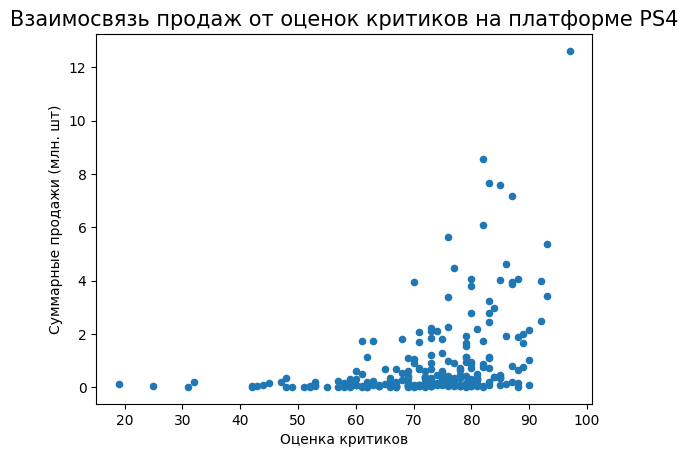

In [47]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
data_PS4 = data_new[data_new['platform'] == 'PS4']
display(data_PS4['critic_score'].corr(data_PS4['sum_sales']))         
data_PS4.plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Взаимосвязь продаж от оценок критиков на платформе PS4', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Суммарные продажи (млн. шт)', fontsize=10)
plt.show()

**Коэффициент корреляции Пирсона 0.4, что говорит о слабой корреляции продаж и оценки критиков. На графике можем отметить следующую закономерность: при оценке критиков выше 60 баллов, продажи игр возможны более 2 млн копий.**

-0.03501047705575578

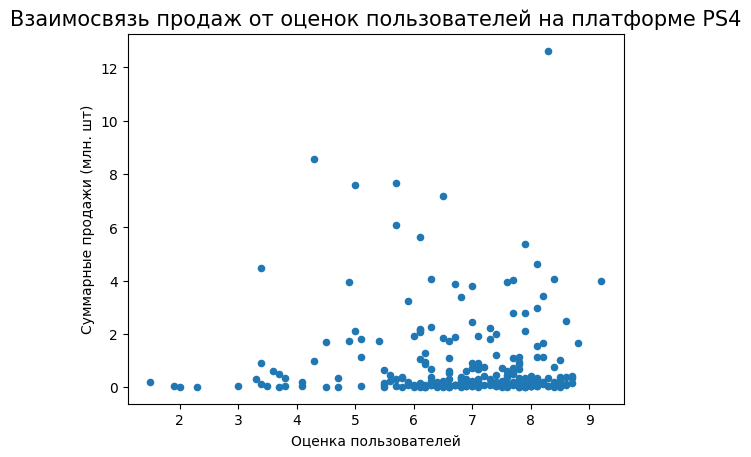

In [48]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
display(data_PS4['user_score'].corr(data_PS4['sum_sales']))      
data_PS4.plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Взаимосвязь продаж от оценок пользователей на платформе PS4', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Суммарные продажи (млн. шт)', fontsize=10)
plt.show()

**Коэффициент корреляции Пирсона -0.03, что говорит об отсутствии корреляции продаж и оценки пользователей**

### Соотнесем выводы с продажами игр на других платформах

0.42867694370333187

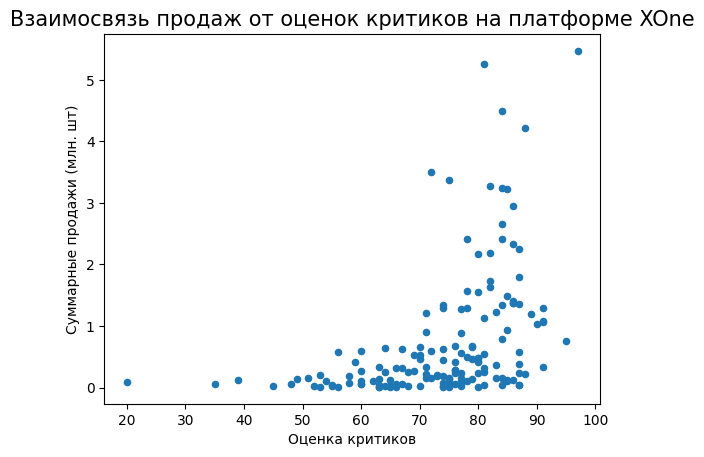

In [49]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
data_XOne = data_new[data_new['platform'] == 'XOne']
display(data_XOne['critic_score'].corr(data_XOne['sum_sales']))      
data_XOne.plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Взаимосвязь продаж от оценок критиков на платформе XOne', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Суммарные продажи (млн. шт)', fontsize=10)
plt.show()

**Коэффициент корреляции Пирсона 0.43, что говорит о слабой корреляции продаж и оценки критиков. На графике можем отметить следующую закономерность: при оценке критиков выше 60 баллов, продажи игр возможны более 1 млн копий**

-0.07146551179048775

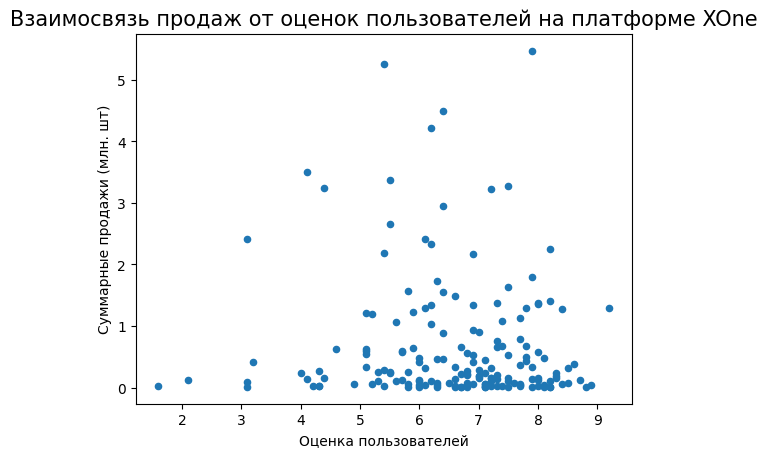

In [50]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
display(data_XOne['user_score'].corr(data_XOne['sum_sales']))      
data_XOne.plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Взаимосвязь продаж от оценок пользователей на платформе XOne', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Суммарные продажи (млн. шт)', fontsize=10)
plt.show()

**Коэффициент корреляции Пирсона -0.07, что говорит об отсутствии корреляции продаж и оценки пользователей**

0.314117492869051

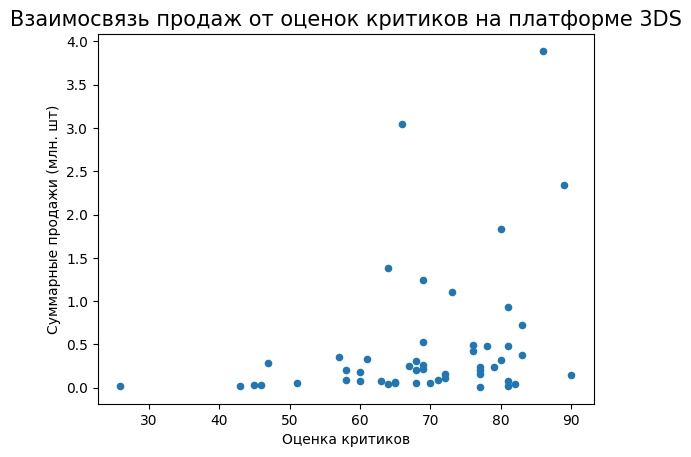

In [51]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
data_3DS = data_new[data_new['platform'] == '3DS']
display(data_3DS['critic_score'].corr(data_3DS['sum_sales']))      
data_3DS.plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Взаимосвязь продаж от оценок критиков на платформе 3DS', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Суммарные продажи (млн. шт)', fontsize=10)
plt.show()

**Коэффициент корреляции Пирсона 0.31, что говорит о слабой корреляции продаж и оценки критиков. На графике можем отметить следующую закономерность: при оценке критиков выше 60 баллов, продажи игр возможны более 0.5 млн копий**

0.23422305769017177

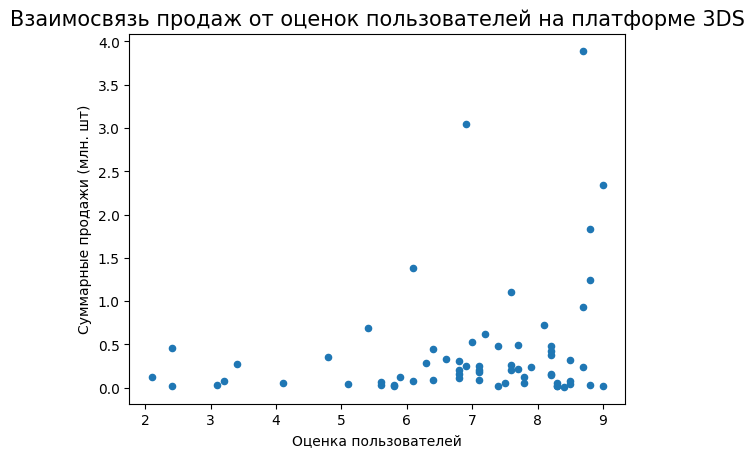

In [52]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
display(data_3DS['user_score'].corr(data_3DS['sum_sales']))      
data_3DS.plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Взаимосвязь продаж от оценок пользователей на платформе 3DS', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Суммарные продажи (млн. шт)', fontsize=10)
plt.show()

**Коэффициент корреляции Пирсона 0.23, что говорит о слабой корреляции продаж и оценки пользователей**

-----

- **Корреляция на платформах PS4 и XOne cхожая. Имеется слабая корреляция продаж и оценки критиков 0.4 и 0.43, от оценки пользователей не зависят совсем -0.03 и -0.07**
- **Корреляция на платформе 3DS немного отличается. Продажи и оценки критиков 0.31, продажи и оценки пользователей 0.23**
- **В целом не выявлено какой-то значимой зависимости оценок критиков и пользователй на продажи**

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [53]:
data_new.groupby('genre')['sum_sales'].agg(['count', 'sum', 'median']).sort_values(by='median', ascending=False)

,count,sum,median
genre,,,
Shooter,128,170.94,0.515
Sports,161,109.48,0.180
Platform,38,18.09,0.140
Fighting,60,28.22,0.125
Role-Playing,221,101.44,0.110
Simulation,44,13.13,0.100
Action,619,199.36,0.090
Misc,113,37.55,0.090
Racing,69,27.52,0.090


- **Самый прибыльный жанр является Shooter - медианное значение продаж 0.5 млн.шт, далее идет Sports 0.18 млн.шт. На третьем месте Platform 0.14 млн.шт. У самых прибыльных жанров имеется определенное сходство - это быстрые активные игры, не заставляют сильно напрягать умственные способности геймера**
- **Самые плохо продаваемые жанры это Puzzle 0.05 млн.шт., Strategy 0.06 млн.шт., Adventure 0.03 млн.шт. Игры не быстрые, заставляют задуматься, решать определенные интелектуальные задачи**

## Составим портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP)**

### Самые популярные платформы (топ-5). Опишем различия в долях продаж

In [54]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']

In [55]:
def region_func(data_new, region):
    data_region = data_new.groupby('platform')[region].sum().sort_values(ascending=False).to_frame().head()
    display(data_region)
    data_region.plot(y=region, kind='pie', autopct='%1.0f%%')
    if region == 'na_sales':
        plt.title('Доля продаж в регионе Северная Америка')
    elif region == 'eu_sales':
        plt.title('Доля продаж в регионе Европа')
    elif region == 'jp_sales':
        plt.title('Доля продаж в Японии')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


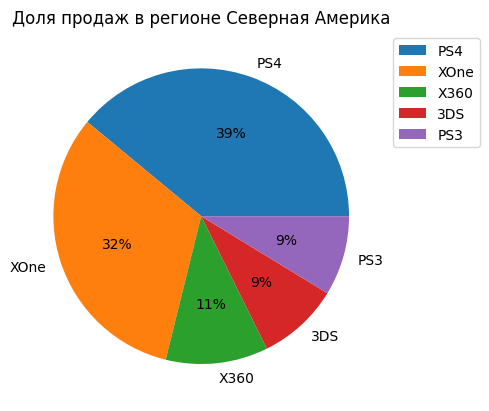

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


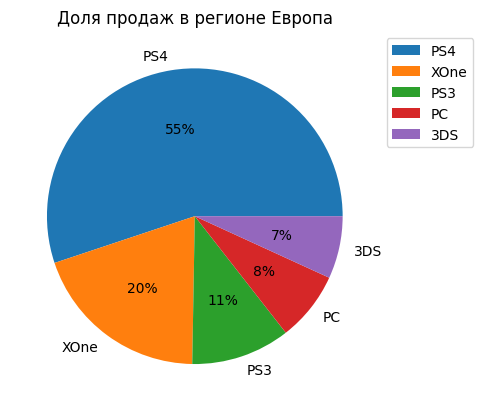

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


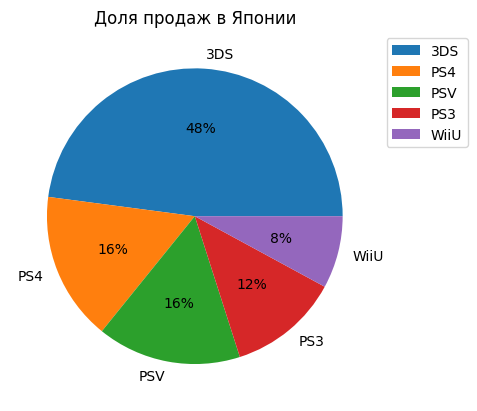

In [56]:
for region in region_list:
    region_func(data_new, region)

- **В Северной Америке самая популярная платформа PS от Sony - 48% (PS4 - 39%, PS3 - 9%). Далее идет Xbox от Microsoft - 43% рынка (XOne - 32%, X360 - 11%). На 3DS - 9%**
- **В Европе на PS от Sony приходится еще большая доля 66% (PS4 - 55%, PS3 - 11%), XOne 20%, PC и 3DS - 8% и 7%**
- **В Японии любимая платформа 3DS - 48% рынка, далее PS - 28% (PS4 - 16%, PS3 - 12%), ощутимая доля у портативных приставок PSV - 16% и WiiU - 8%**

### Самые популярные жанры (топ-5). Поясним разницу

In [57]:
def genre_func(data_new, region):
    data_region = data_new.groupby('genre')[region].sum().sort_values(ascending=False).to_frame().head()
    display(data_region)
    data_region.plot(y=region, kind='pie', autopct='%1.0f%%')
    if region == 'na_sales':
        plt.title('Доля продаж в регионе Северная Америка')
    elif region == 'eu_sales':
        plt.title('Доля продаж в регионе Европа')
    elif region == 'jp_sales':
        plt.title('Доля продаж в Японии')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


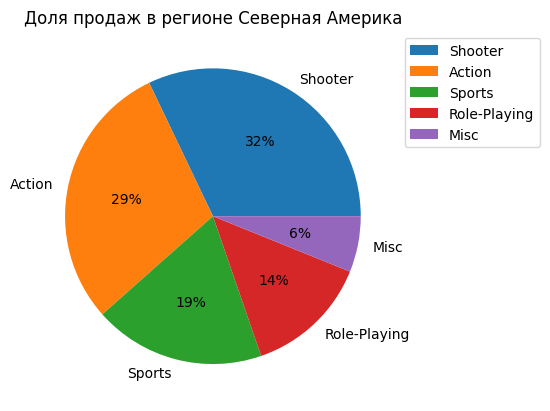

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


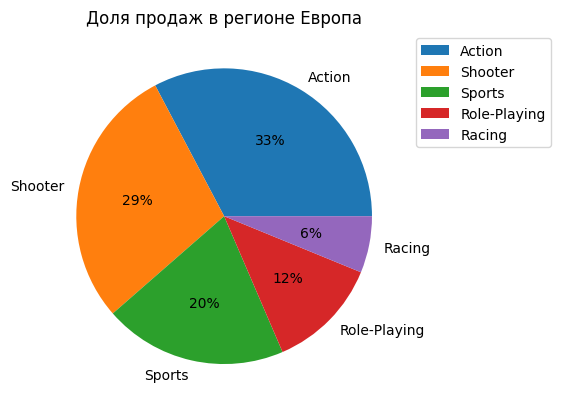

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


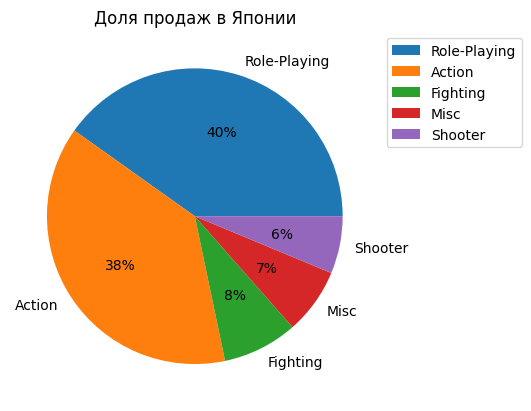

In [58]:
for region in region_list:
    genre_func(data_new, region)

- **В Северной Америке самый популярный жанр Shooter - 32%, далее Action - 29%, Sport - 19%. Затем идут Role-Playing и Misc по 14% и 6%**
- **В Европе самый популярный жанр Action - 33%, далее Shooter - 29%, Sport - 20%. Затем идут Role-Playing и Racing по 12% и 6%**
- **В Северной Америке и Европе вкусовые предпочтения геймеров почти одинаковые**
- **В Японии самый популярный жанр Role-Playing - 40%, затем идет Action - 38%. На жанры Fighting, Misc и Shooter приходится 8%, 7% и 6%**

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**M** («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.  
**E** («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.  
**T** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.  
**E10+** («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.  
**EC** («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.

In [59]:
def rating_func(data_new, region):
    data_region = data_new.groupby('rating')[region].sum().sort_values(ascending=False).to_frame().head()
    display(data_region)
    data_region.plot(y=region, kind='pie', autopct='%1.0f%%')
    if region == 'na_sales':
        plt.title('Доля продаж в регионе Северная Америка')
    elif region == 'eu_sales':
        plt.title('Доля продаж в регионе Европа')
    elif region == 'jp_sales':
        plt.title('Доля продаж в Японии')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

,na_sales
rating,
M,96.42
no_rating,64.72
E,50.74
T,38.95
E10+,33.23


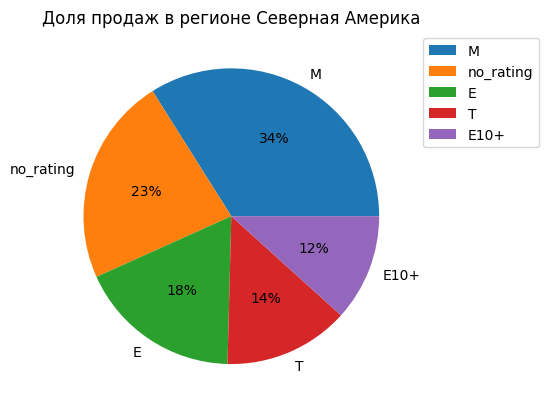

,eu_sales
rating,
M,93.44
no_rating,58.95
E,58.06
T,34.07
E10+,26.16


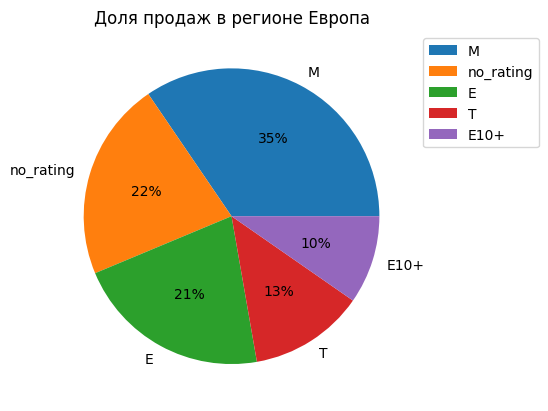

,jp_sales
rating,
no_rating,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


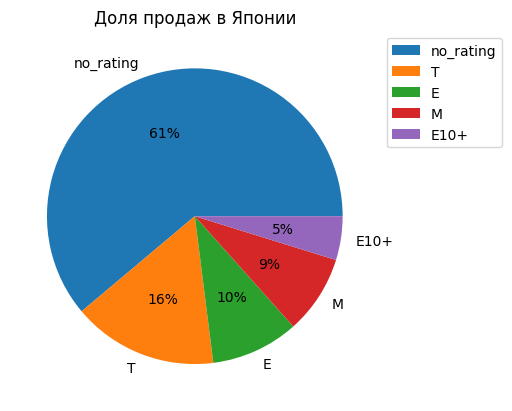

In [60]:
for region in region_list:
    rating_func(data_new, region)

- **В Севреной Америке самый распростаненный рейтинг M - 34%, далее идут игры без рейтинга - 23%, рейтинг E - 18%. Затем идут рейтинги T и E10+ - 14 и 12%**
- **В Европе самый распростаненный рейтинг M - 35%, далее идут игры без рейтинга - 22%, рейтинг E - 21%. Затем идут рейтинги T и E10+ - 13 и 10%**
- **В Северной Америке и Европе похожее распределние игр по жанрам**
- **В Японии самые распространенные игры без рейтинга - 61%, далее идут категории T и E - 16% и 10% соответсвенно. На категорию M приходится 9%. E10+: 5%**

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средний рейтинг (user_score) пользователей Xbox One = средний рейтинг (user_score) пользователей PC
H_a: Средний рейтинг (user_score) пользователей Xbox One ≠ средний рейтинг (user_score) пользователей PC
alpha = 0.05
```

In [61]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(data_new[(data_new['platform'] == 'XOne') & (data_new['user_score'] > 0)]['user_score'], 
                       data_new[(data_new['platform'] == 'PC') & (data_new['user_score'] > 0)]['user_score'],
                       equal_var = False
                      )

alpha = 0.05  # задайте значение уровня значимости

# вывод значения p-value на экран
display(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.13130164268727834

Не получилось отвергнуть нулевую гипотезу


**P-value мы приняли 5% - это является общепринятым пороговым значением. Данная гипотеза является двухсторонней, так как нам не важно в какую сторону может отклониться средний рейтинг. Так же у нас нет оснований утверждать, что дисперсии наших выборок одинаковые, поэтом параметр equal_var принимаем как False.**  
**Значение p-value показывает: вероятность случайно получить такое или большее различие равно 13%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками пользователей. Полученные данные не противоречат гипотезе о том, что *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*.**

### Средние пользовательские рейтинги жанров Action и Sports разные

```
H_0: Средний пользовательский рейтинг (user_score) жанра Action = средний рейтинг (user_score) жанра Sports
H_a: Средний пользовательский рейтинг (user_score) жанра Action ≠ средний рейтинг (user_score) жанра Sports
alpha = 0.05
```

In [62]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(data_new[(data_new['genre'] == 'Action') & (data_new['user_score'] > 0)]['user_score'], 
                       data_new[(data_new['genre'] == 'Sports') & (data_new['user_score'] > 0)]['user_score'],
                       equal_var = False
                      )

alpha = 0.05  # задайте значение уровня значимости

# вывод значения p-value на экран
display(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.3080710852425688e-13

Отвергаем нулевую гипотезу


**P-value мы приняли 5% - это является общепринятым пороговым значением. Данная гипотеза является двухсторонней, так как нам не важно в какую сторону может отклониться средний рейтинг. Так же у нас нет оснований утверждать, что дисперсии наших выборок одинаковые, поэтом параметр equal_var принимаем как False.**  
**Значение p-value показывает: вероятность случайно получить такое или большее различие почти 0%. Это достаточная вероятность, чтобы делать вывод о значимом различии между средними оценками пользователей. Полученные данные противоречат нулевой гипотезе о том, что *Средние пользовательские рейтинги платформ жанров Action и Sports одинаковые*, поэтому у нас есть основания отбросить нулевую гипотезу и принять гипотезу о том, что рейтинги разные.**

## Общий вывод

### Общая информация о файле с данными

- **Отобразили начальные строки таблицы и общую информацию**
-- Имеем таблицу с 11 столбцами(6 числовых и 5 строковых) и 16715 строками
- **Описание данных**
1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- **Данные за 2016 год могут быть неполными**
- **Построили общую гистограмму для всех числовых столбцов таблицы, предварительно наблюдаем:** 
-- большее количество игр было выпущено с 2009 по 2012 годы, до 1992 года количесвтво игр было не значительное
-- большая часть продаж игры в регионе Сверной Америки до 5 млн. копий
-- большая часть продаж игры в регионе Европы до 3 млн. копий
-- большая часть продаж игры в Японии до 1 млн. копий
-- большая часть продаж игры в других регионах до 1 млн. копий
-- самая популярная оценка критиков 70-80 баллов, частота меньших и больших оценок снижается

### Предобработали данные

- **заменили названия столбцов (привели к нижнему регистру)**
- **преобразовали данные в нужные типы**
-- в столбце year_of_release перевели значения в специальный формат для работы с датами
- **обработали пропуски**
-- определили количество пропущенных значений для каждого столбца
-- попытались описать причины, которые могли привести к пропускам
-- - большая часть пропусков у игр, продажи которых не высокие, возможно данных от пользователей и критиков не хватает для выставления оценок и рейтингов у таких игр
-- заполнили пропуски
-- - в столбце rating текстовым значением 'no_rating', по смыслу это ничего не изменит, но в дальнейшем позволит корректно провести исследование
-- - в столбце name текстовым значением 'no_name', по смыслу это ничего не изменит, но в дальнейшем позволит корректно провести исследование
-- - в столбцах year_of_release, critic_score, user_score заполнять не будем, так как невозможно предложить логичную замену, оставим эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать
-- - в столбце user_score содержится значение tbd, оно означает To Be Determined, не определено по каким-то причинам. Т.е другими словами нет данных. Заменили эти значения на NaN
- **обработали дубликаты**
-- явные дубликаты отсутствуют
-- выявили неявные дубликаты, в нашем проекте это могут быть дубликаты для пары "Имя - Игровая консоль", нашли 5 дубликатов и обработали их вручную, часть данных оставили без изменений, часть удалили
- **обработали редкие и выбивающиеся значения**
-- артефактов не обнаружено, все значения адекватны
- **посчитали суммарные продажи во всех регионах и записали их в отдельный столбец**

### Провели исследовательский анализ

- посмотрели, сколько игр выпускалось в разные годы. **С 1980 по 1993 годы, выпуск игр был незначительный (менее 100 игр в год) по сравнению с последующим периодом. Данные за этот период не так важны**
- посмотрели, как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам. Определили характерный срок появления новых и закат старых платформ. **Топ-10 платформ за все время: `PS2 X360 PS3 Wii DS PS GBA PS4 PSP PC`. Медианный возраст жизни платформ-лидеров 11 лет. График жизни платформ похож на колокол, идет нарастание продаж до пика, затем идет спад и конец цикла существования консоли.**
- определили актуальный период в результате исследования. Основной фактор — эти данные помогут построить прогноз на 2017 год. В такой динамично меняющейся индустрии, как компьютерные игры не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. В нашем случае посчитали, что 3 года: **2014, 2015 и неполный 2016 - оптимальный выбор**
- определили платформы-лидеры по продажам за период 2014-2016 гг: `PS4 XOne 3DS PS3 X360 WiiU PC PSV Wii PSP`, оценили на каком жизненном этапе находятся эти платформы, выбрали несколько потенциально прибыльных платформ: **PS4, XOne, 3DS**
- **построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описали результат**
-- на платформе `PS4` большая часть игр продается от 0.06 до 0.7 млн. копий, при этом медианное число копий 0.185 млн. Большое количество выбросов говорят о том, что на платформе часто выходят очень кассовые игры. Выпущено больше всего игр (376 шт.) за период 2014-2016**
-- на платформе `XOne` большая часть игр продается от 0.05 до 0.63 млн. копий, при этом медианное число копий 0.2 млн. Выбросов не так много, платформа достаточно стабильная**
-- из тройки лидеров `3DS` выступает в качестве аутсайдера, большая часть игр продается от 0.03 до 0.25 млн. копий, медианное число копий 0.09 млн
- **посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Сформулировали выводы и сравнили эти показатели с другими платформами** 
-- корреляция на платформах PS4 и XOne cхожая. Имеется слабая корреляция продаж и оценки критиков 0.4 и 0.43, от оценки пользователей не зависят совсем -0.03 и -0.07**
-- корреляция на платформе 3DS немного отличается. Продажи и оценки критиков 0.31, продажи и оценки пользователей 0.23**
-- в целом не выявлено какой-то значимой зависимости оценок критиков и пользователй на продажи
- **посмотрели на общее распределение игр по жанрам** 
-- самый прибыльный жанр является Shooter - медианное значение продаж 0.5 млн.шт, далее идет Sports 0.18 млн.шт. На третьем месте Platform 0.14 млн.шт. У самых прибыльных жанров имеется определенное сходство - это быстрые активные игры, не заставляют сильно напрягать умственные способности геймера
-- самые плохо продаваемые жанры это Puzzle 0.05 млн.шт., Strategy 0.06 млн.шт., Adventure 0.03 млн.шт. Игры не быстрые, заставляют задуматься, решать определенные интелектуальные задачи

### Составили портрет пользователя каждого региона NA, EU, JP

#### По платформам

- **В Северной Америке самая популярная платформа PS от Sony - 48% (PS4 - 39%, PS3 - 9%). Далее идет Xbox от Microsoft - 43% рынка (XOne - 32%, X360 - 11%). На 3DS - 9%**
- **В Европе на PS от Sony приходится еще большая доля 66% (PS4 - 55%, PS3 - 11%), XOne 20%, PC и 3DS - 8% и 7%**
- **В Японии любимая платформа 3DS - 48% рынка, далее PS - 28% (PS4 - 16%, PS3 - 12%), ощутимая доля у портативных приставок PSV - 16% и WiiU - 8%**

#### По жанрам

- **В Северной Америке самый популярный жанр Shooter - 32%, далее Action - 29%, Sport - 19%. Затем идут Role-Playing и Misc по 14% и 6%**
- **В Европе самый популярный жанр Action - 33%, далее Shooter - 29%, Sport - 20%. Затем идут Role-Playing и Racing по 12% и 6%**
- **В Северной Америке и Европе вкусовые предпочтения геймеров почти одинаковые**
- **В Японии самый популярный жанр Role-Playing - 40%, затем идет Action - 38%. На жанры Fighting, Misc и Shooter приходится 8%, 7% и 6%**

#### По рейтингу ESRB

- **В Севреной Америке самый распростаненный рейтинг M - 34%, далее идут игры без рейтинга - 23%, рейтинг E - 18%. Затем идут рейтинги T и E10+ - 14 и 12%**
- **В Европе самый распростаненный рейтинг M - 35%, далее идут игры без рейтинга - 22%, рейтинг E - 21%. Затем идут рейтинги T и E10+ - 13 и 10%**
- **В Северной Америке и Европе похожее распределние игр по жанрам**
- **В Японии самые распространенные игры без рейтинга - 61%, далее идут категории T и E - 16% и 10% соответсвенно. На категорию M приходится 9%. E10+: 5%**

### Проверили гипотезы

- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**. Вероятность получить **равенство** средних пользовательских рейтингов платформ Xbox One и PC равно **13%**. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками пользователей. Полученные данные не противоречат гипотезе о том, что **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
- **Средние пользовательские рейтинги жанров Action и Sports разные**. Вероятность получить **равенство** средних пользовательских рейтингов Action и Sports почти **0%**. Это достаточная вероятность, чтобы делать вывод о значимом различии между средними оценками пользователей. Полученные данные противоречат нулевой гипотезе о том, что Средние пользовательские рейтинги платформ жанров Action и Sports одинаковые, поэтому у нас есть основания отбросить нулевую гипотезу и принять гипотезу о том, что рейтинги разные.

### Вывод

Мы выявили определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на будущие периоды. Прогнозируя рекламную компанию "Стримчика" на 2017 год предлагаем опираться на следующие выводы:
- **Лучший потенциал на 2017 год имеют следующие платформы: `PS4, XOne, 3DS`**
- **Самый прибыльный жанр является `Shooter`, остальные жанры сильно отстают**
- **Какого либо значимого влияние оценки критиков и пользователей на продажи не обнаружено**
- **Для Северной Америки рекомендуется использовать платформы `PS4 или XOne`, жанр `Shooter или Action`, рейтинг `M`**
- **Для Европы рекомендуется использовать платформу `PS4`, жанр `Shooter или Action`, рейтинг `M`**
- **Для Японии рекомендуется использовать платформу `3DS`, жанр `Role-Playing или Action`, без рейтинга**
- **Основная рекомендация игры в жанре `Shooter` на платформе `PS4` с рейтингом `M или без рейтинга`**